In [1]:
import time
import datetime
import pandas as pd

In [4]:
ticker = 'AMZN'
period1 = int(time.mktime(datetime.datetime(2022, 12, 1, 23, 59).timetuple()))
period2 = int(time.mktime(datetime.datetime.now().timetuple()))
interval = '1d'

query_string = f'https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={period1}&period2={period2}&interval={interval}&events=history&includeAdjustedClose=true'

df = pd.read_csv(query_string)

In [5]:
query_string

'https://query1.finance.yahoo.com/v7/finance/download/AMZN?period1=1669919340&period2=1703532774&interval=1d&events=history&includeAdjustedClose=true'

In [6]:
datetime.datetime.now().timetuple()

time.struct_time(tm_year=2023, tm_mon=12, tm_mday=26, tm_hour=1, tm_min=3, tm_sec=5, tm_wday=1, tm_yday=360, tm_isdst=-1)

In [7]:
date = df

In [8]:
date

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-12-01,96.989998,97.230003,94.919998,95.500000,95.500000,68488000
1,2022-12-02,94.480003,95.360001,93.779999,94.129997,94.129997,72496400
2,2022-12-05,93.050003,94.059998,90.820000,91.010002,91.010002,71535500
3,2022-12-06,90.500000,91.040001,87.900002,88.250000,88.250000,75503600
4,2022-12-07,88.339996,89.889999,87.480003,88.459999,88.459999,68086900
...,...,...,...,...,...,...,...
262,2023-12-18,150.559998,154.850006,150.050003,154.070007,154.070007,62512800
263,2023-12-19,154.399994,155.119995,152.690002,153.789993,153.789993,43171300
264,2023-12-20,152.899994,155.630005,151.559998,152.119995,152.119995,50322100
265,2023-12-21,153.300003,153.970001,152.100006,153.839996,153.839996,36305700


In [9]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-12-01,96.989998,97.230003,94.919998,95.500000,95.500000,68488000
1,2022-12-02,94.480003,95.360001,93.779999,94.129997,94.129997,72496400
2,2022-12-05,93.050003,94.059998,90.820000,91.010002,91.010002,71535500
3,2022-12-06,90.500000,91.040001,87.900002,88.250000,88.250000,75503600
4,2022-12-07,88.339996,89.889999,87.480003,88.459999,88.459999,68086900
...,...,...,...,...,...,...,...
262,2023-12-18,150.559998,154.850006,150.050003,154.070007,154.070007,62512800
263,2023-12-19,154.399994,155.119995,152.690002,153.789993,153.789993,43171300
264,2023-12-20,152.899994,155.630005,151.559998,152.119995,152.119995,50322100
265,2023-12-21,153.300003,153.970001,152.100006,153.839996,153.839996,36305700


In [10]:
import matplotlib.pyplot as plt

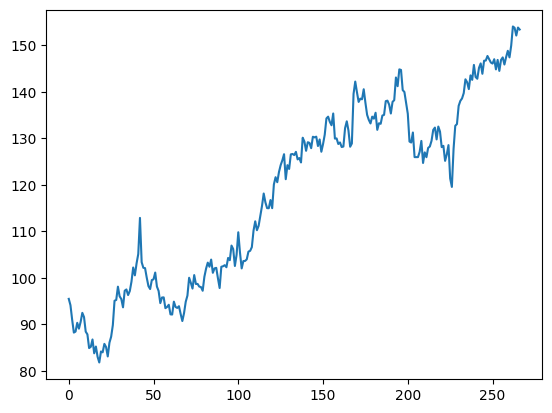

In [11]:
plt.plot(df['Close'])

In [12]:
df = df[['Date', 'Close']]

In [13]:
df

,Date,Close
0,2022-12-01,95.500000
1,2022-12-02,94.129997
2,2022-12-05,91.010002
3,2022-12-06,88.250000
4,2022-12-07,88.459999
...,...,...
262,2023-12-18,154.070007
263,2023-12-19,153.789993
264,2023-12-20,152.119995
265,2023-12-21,153.839996


In [14]:
def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)


In [15]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

C:\Users\User\AppData\Local\Temp\ipykernel_26812\2565755782.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


0     2022-12-01
1     2022-12-02
2     2022-12-05
3     2022-12-06
4     2022-12-07
         ...    
262   2023-12-18
263   2023-12-19
264   2023-12-20
265   2023-12-21
266   2023-12-22
Name: Date, Length: 267, dtype: datetime64[ns]

In [16]:
df.index = df.pop('Date')
df

,Close
Date,
2022-12-01,95.500000
2022-12-02,94.129997
2022-12-05,91.010002
2022-12-06,88.250000
2022-12-07,88.459999
...,...
2023-12-18,154.070007
2023-12-19,153.789993
2023-12-20,152.119995


In [17]:
dt = date['Date'].iloc[3]

In [18]:
dt

'2022-12-06'

In [23]:
curr = str(datetime.datetime.now()-datetime.timedelta(days=4))

In [24]:
curr

'2023-12-22 01:04:32.813405'

In [25]:
curr = curr[0:10]

In [26]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df

windowed_df = df_to_windowed_df(df, 
                                dt, 
                                curr, 
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2022-12-06,95.500000,94.129997,91.010002,88.250000
1,2022-12-07,94.129997,91.010002,88.250000,88.459999
2,2022-12-08,91.010002,88.250000,88.459999,90.349998
3,2022-12-09,88.250000,88.459999,90.349998,89.089996
4,2022-12-12,88.459999,90.349998,89.089996,90.550003
...,...,...,...,...,...
259,2023-12-18,148.839996,147.419998,149.970001,154.070007
260,2023-12-19,147.419998,149.970001,154.070007,153.789993
261,2023-12-20,149.970001,154.070007,153.789993,152.119995
262,2023-12-21,154.070007,153.789993,152.119995,153.839996


In [27]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1]))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((264,), (264, 3), (264,))

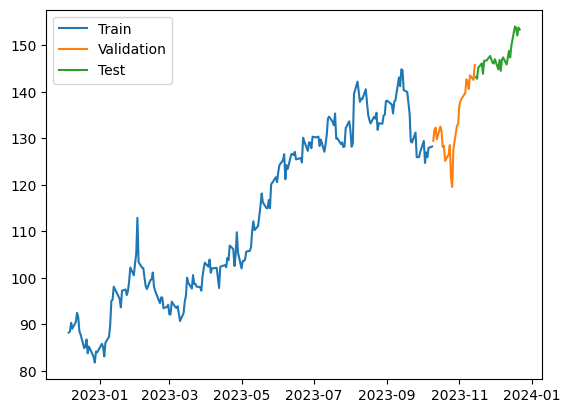

In [28]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [29]:
import tensorflow as tf
from tensorflow import keras


In [52]:
model = keras.Sequential([keras.layers.Input((3, 1)),
                    tf.keras.layers.Bidirectional(keras.layers.LSTM(64)),
                    keras.layers.Dense(32, activation='relu'),
                    keras.layers.Dense(32, activation='relu'),
                    keras.layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
7/7 [==============================] - 2s 71ms/step - loss: 13018.0049 - mean_absolute_error: 112.6803 - val_loss: 17711.4688 - val_mean_absolute_error: 132.9031
Epoch 2/100
7/7 [==============================] - 0s 7ms/step - loss: 12911.7764 - mean_absolute_error: 112.2099 - val_loss: 17550.1777 - val_mean_absolute_error: 132.2949
Epoch 3/100
7/7 [==============================] - 0s 6ms/step - loss: 12759.2441 - mean_absolute_error: 111.5254 - val_loss: 17333.7148 - val_mean_absolute_error: 131.4743
Epoch 4/100
7/7 [==============================] - 0s 7ms/step - loss: 12552.5459 - mean_absolute_error: 110.5945 - val_loss: 17049.6094 - val_mean_absolute_error: 130.3894
Epoch 5/100
7/7 [==============================] - 0s 6ms/step - loss: 12287.5889 - mean_absolute_error: 109.3928 - val_loss: 16690.5234 - val_mean_absolute_error: 129.0049
Epoch 6/100
7/7 [==============================] - 0s 7ms/step - loss: 11941.9326 - mean_absolute_error: 107.7992 - val_loss: 16197.13

7/7 [==============================] - 0s 1ms/step


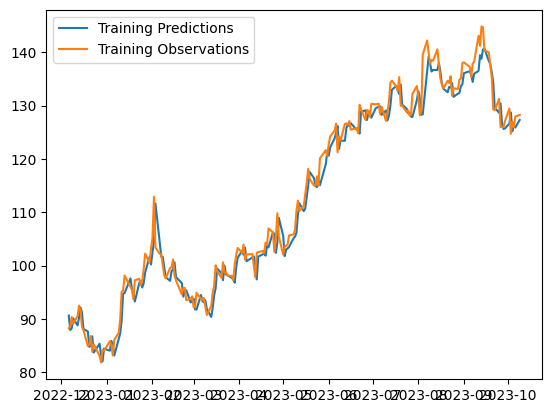

In [53]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

1/1 [==============================] - 0s 18ms/step


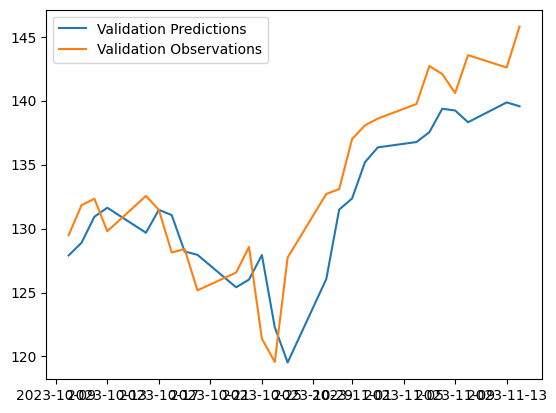

In [54]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

1/1 [==============================] - 0s 19ms/step


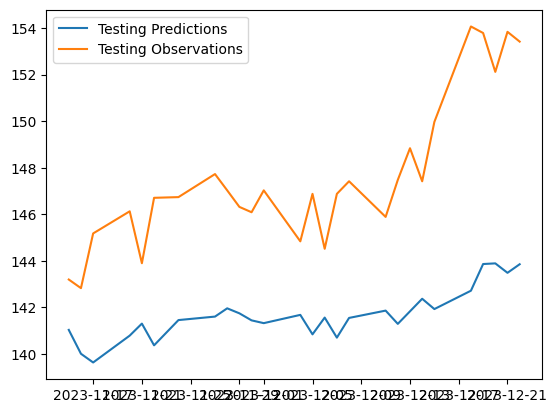

In [55]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

In [56]:
dates_test

array([Timestamp('2023-11-15 00:00:00'), Timestamp('2023-11-16 00:00:00'),
       Timestamp('2023-11-17 00:00:00'), Timestamp('2023-11-20 00:00:00'),
       Timestamp('2023-11-21 00:00:00'), Timestamp('2023-11-22 00:00:00'),
       Timestamp('2023-11-24 00:00:00'), Timestamp('2023-11-27 00:00:00'),
       Timestamp('2023-11-28 00:00:00'), Timestamp('2023-11-29 00:00:00'),
       Timestamp('2023-11-30 00:00:00'), Timestamp('2023-12-01 00:00:00'),
       Timestamp('2023-12-04 00:00:00'), Timestamp('2023-12-05 00:00:00'),
       Timestamp('2023-12-06 00:00:00'), Timestamp('2023-12-07 00:00:00'),
       Timestamp('2023-12-08 00:00:00'), Timestamp('2023-12-11 00:00:00'),
       Timestamp('2023-12-12 00:00:00'), Timestamp('2023-12-13 00:00:00'),
       Timestamp('2023-12-14 00:00:00'), Timestamp('2023-12-15 00:00:00'),
       Timestamp('2023-12-18 00:00:00'), Timestamp('2023-12-19 00:00:00'),
       Timestamp('2023-12-20 00:00:00'), Timestamp('2023-12-21 00:00:00'),
       Timestamp('2023-12

In [57]:
test_predictions

array([141.03665, 140.01114, 139.63669, 140.79047, 141.30658, 140.37271,
       141.45789, 141.6079 , 141.9627 , 141.74834, 141.44562, 141.32608,
       141.6813 , 140.84515, 141.5651 , 140.70383, 141.55045, 141.86482,
       141.2952 , 141.83435, 142.37381, 141.93106, 142.71973, 143.86551,
       143.89383, 143.48824, 143.85649], dtype=float32)

In [58]:
df

,Close
Date,
2022-12-01,95.500000
2022-12-02,94.129997
2022-12-05,91.010002
2022-12-06,88.250000
2022-12-07,88.459999
...,...
2023-12-18,154.070007
2023-12-19,153.789993
2023-12-20,152.119995


In [59]:
req = windowed_df.tail(3)
req['Target']

261    152.119995
262    153.839996
263    153.419998
Name: Target, dtype: float64

In [60]:
inp = tuple(req['Target'])

In [61]:
inp

(152.119995, 153.839996, 153.419998)

In [62]:
npin = np.asarray(inp)
rs = npin.reshape(1, -1)
stk_pred = model.predict(rs)

1/1 [==============================] - 0s 21ms/step


In [63]:
stk_pred

array([[143.80319]], dtype=float32)

In [64]:
today = float(stk_pred)

In [65]:
today

143.80319213867188

In [66]:
req1 = windowed_df.tail(2)
tom = list(req1['Target'])

In [67]:
tom = tom + [today,]

In [68]:
tom

[153.839996, 153.419998, 143.80319213867188]

In [69]:
tom1 = tuple(tom)

In [70]:
tom1

(153.839996, 153.419998, 143.80319213867188)

In [71]:
npin = np.asarray(tom1)
rs = npin.reshape(1, -1)
tom_pred = model.predict(rs)

1/1 [==============================] - 0s 19ms/step


In [72]:
tom_pred

array([[140.61438]], dtype=float32)